# Final Project - Hospitalization Prediction for Elderly People

The project aims to predict the probability of hospitalization for elderly Mexican individuals using machine learning algorithms. The model can help healthcare providers identify high-risk patients and allocate resources accordingly.
 

# Goal:
The main goal of this project is to ask users to complete a form and use the provided information to predict the risk of hospitalization for that person in the next year. For that task, a Machine Learning model must be trained to make that prediction.

In [1]:
# Import the libraries
import pandas as pd
import pyreadstat
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sas7bdat import SAS7BDAT


In [2]:
from src import extract_data as data, preprocessing, eda

# 1. Data Extraction

* *The Mexican Health and Aging Study* (**MHAS**) is a dataset of household surveys designed to collect information on the health, economic status, and quality of life of older adults.
The survey was conducted over 5 time periods, technically known as **Waves**. 
In addition, there are three study subjects: the respondent (r), the spouse (s), and the household (H). For this study we will use the last wave and the respondent(r).

To access the data for this project, you only need to execute the code below. This will download H_MHAS_c2.sas7bdat file inside the `dataset` folder:

In [ ]:
# Run only once, or if you need to rebuild the original data
# df = data.download_dataset()

In [ ]:
# print('We have',df.shape[0],'subjects')
# print('We have',df.shape[1],'features')
# print('Head', df.head())

If you have download the dataset, you only need to execute the code below. 

In [3]:
# Read the data
file_path = r'C:\Users\sever\Documents\MEGA\Erika-trabajo\docencia\anyone ai\proyecto-final\proyecto_grupo\dataset\H_MHAS_c2.sav'

# Read the file .sav
df, meta = pyreadstat.read_sav(file_path)

# convertir el df en un archivo csv
df.to_csv(file_path + 'mi_dataset.csv', index=False) 

## 2. Data Analysis Exploratory of all Database

2.1. Amount of features and users of the data set

In [4]:
u,f=df.shape
print('The data set has ',f,' features and ',u,' users')

The data set has  5241  features and  26839  users


The dataset `H_MHAS_c2.sas7bdat` has 26839 rows and 5241 features.

All features are divided into the following sections.

- SECTION A: DEMOGRAPHICS, IDENTIFIERS, AND WEIGHTS 
- SECTION B: HEALTH 
- SECTION C: HEALTH CARE UTILIZATION AND INSURANCE 
- SECTION D: COGNITION  
- SECTION E: FINANCIAL AND HOUSING WEALTH 
- SECTION F: INCOME
- SECTION G: FAMILY STRUCTURE 
- SECTION H: EMPLOYMENT HISTORY 
- SECTION I: RETIREMENT 
- SECTION J: PENSION 
- SECTION K: PHYSICAL MEASURES
- SECTION L: ASSISTANCE AND CAREGIVING
- SECTION M: STRESS 
- SECTION O: END OF LIFE PLANNING
- SECTION Q: PSYCHOSOCIAL

2.2 Features Types

In [5]:
categorical_vars = df.select_dtypes(include=['object']).columns
numerical_vars = df.select_dtypes(include=['float64']).columns

print('Categorical features ' + str(len(categorical_vars)))
print('Numerical features ' + str(len(numerical_vars)) )

Categorical features 7
Numerical features 5234


We will save the features with the possible values.

In [6]:
preprocessing.save_categorical_features_with_values(df, 'features_with_values.txt')

Categorical features with their unique values have been saved to 'features_with_values.txt'


2.3. Filtering the subjects that are alive

* In this study, we will focus on the Alive subjects


In [7]:
dff = df[(df[['inw5']] == 1).all(axis=1)]
print(dff['inw5'].unique())
print(dff.shape)
df2=dff

[1.]
(17114, 5241)


2.4. Age Distribution of all dataset

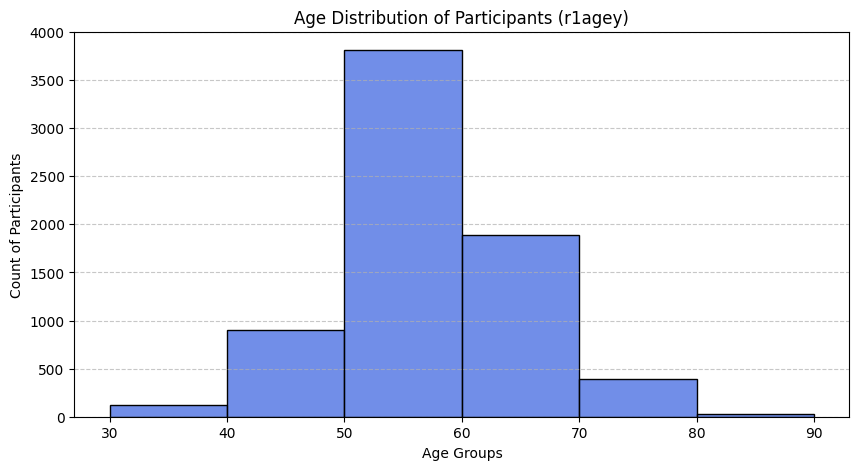

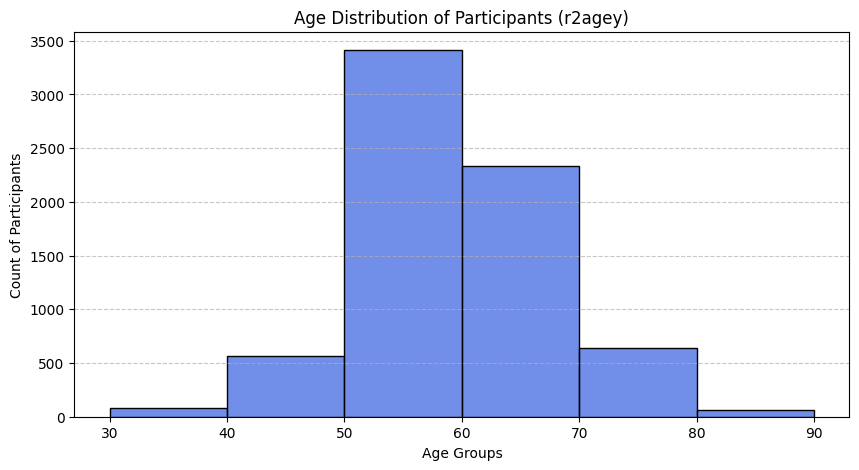

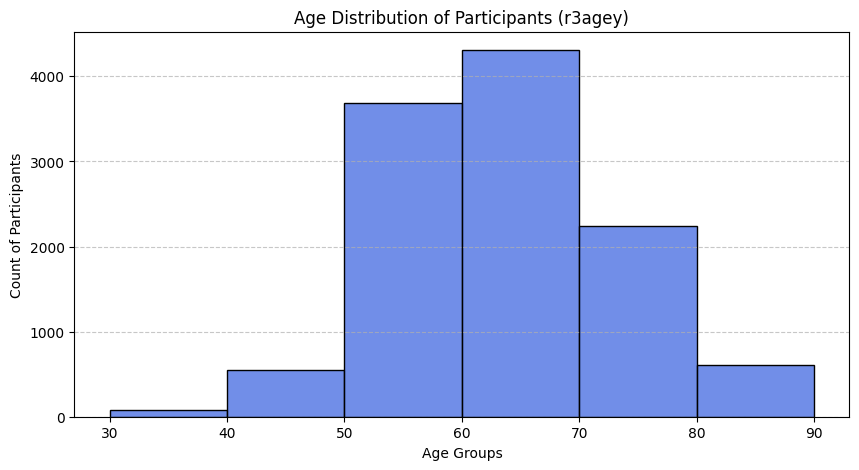

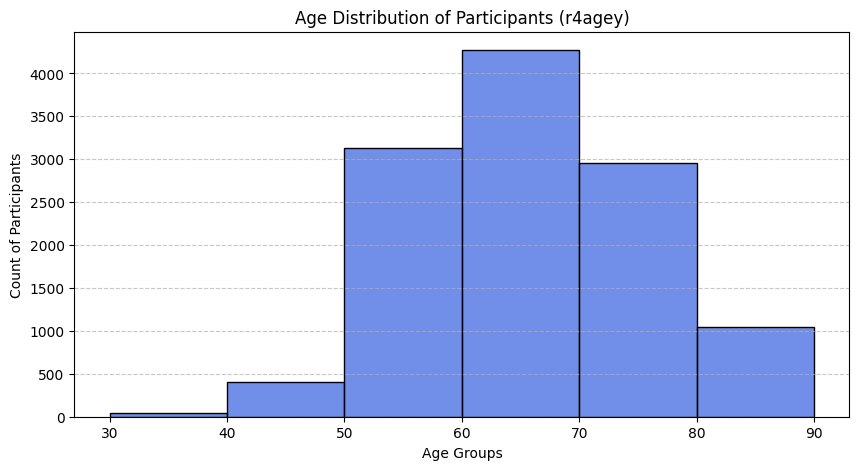

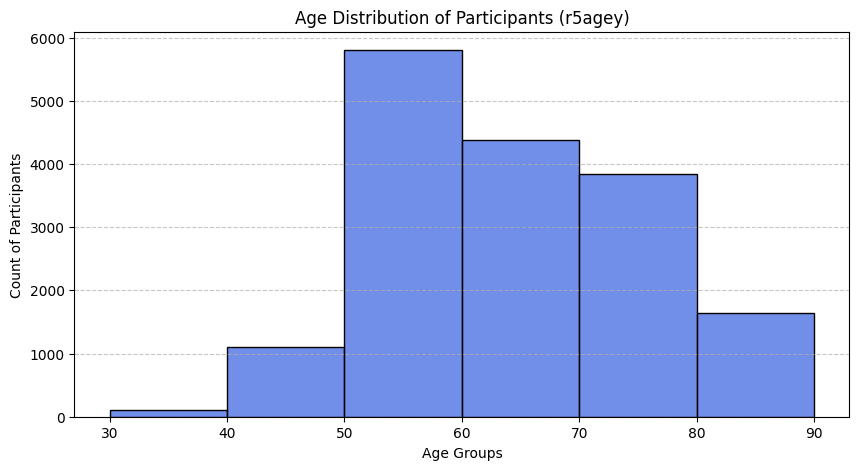

In [25]:
eda.plot_age_histogram(df2, 'r1agey')
eda.plot_age_histogram(df2, 'r2agey')
eda.plot_age_histogram(df2, 'r3agey')
eda.plot_age_histogram(df2, 'r4agey')
eda.plot_age_histogram(df2, 'r5agey')

2.5. Target variable in all Dataset

* The target variable belongs to *Section C: Health Care Utilization and Insurance* and is labeled **Medical Care Utilization: Hospital** *`rhosp1y`*

* *rhosp1y* indicates whether the respondent reports at least one overnight hospital stay in the last 12 months. RHOSP1Y is coded as 0 if the respondent had no overnight hospital stays, and is coded as 1 if the respondent had at least one overnight hospital stay. 

* Our first step is to remove all rows containing missing values in our target variable. Why remove them instead of imputate them? Because this is our ground truth: We cannot alter it by somehow estimating missing values from the data. If we attempt to imputate our ground truth with other features, we'd be incorporating information about the data into the target variable, which could very likely lead us to overfit our model.
* Counting the Hospitalized and not Hospitalized subjects in the last 12 months.
* Plot of Hospitalized and not Hospitalized.

2.5.1. Porcentage of hospitalizations in Wave 1

r1hosp1y
0.0    6663
1.0     502
Name: count, dtype: int64


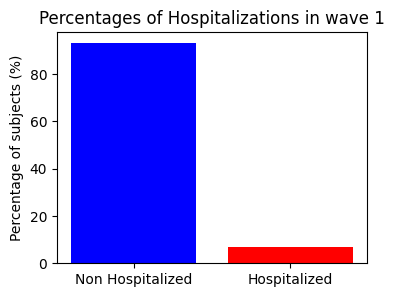

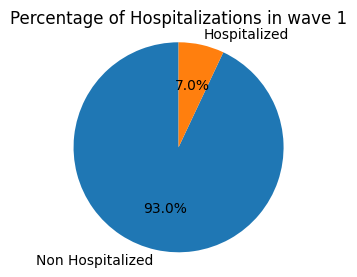

In [41]:
df2['r1hosp1y'].unique()

df2_notnan=df2.dropna(subset=['r1hosp1y'])
df2.shape

cant_hosp=df2_notnan['r1hosp1y'].value_counts()
print (cant_hosp)


# Bar Plot
# Total number of subjects
total_personas = cant_hosp.sum()
# Percentages
porcentajes = cant_hosp / total_personas * 100
# Plot
plt.figure(figsize=(4, 3))
plt.bar(porcentajes.index, porcentajes.values, color=['blue', 'red'])
plt.xticks([0, 1], ['Non Hospitalized', 'Hospitalized'])
plt.ylabel('Percentage of subjects (%)')
plt.title('Percentages of Hospitalizations in wave 1')
plt.show()


#pie Plot
# Calcular el total de personas
total_personas = cant_hosp.sum()
# Calcular los porcentajes
porcentajes = cant_hosp / total_personas * 100
# Crear el gráfico circular
plt.figure(figsize=(4, 3))
plt.pie(porcentajes, labels=['Non Hospitalized', 'Hospitalized'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Para que el círculo sea perfecto
plt.title('Percentage of Hospitalizations in wave 1')
plt.show()

2.5.2. Porcentage of hospitalizations in Wave 2

r2hosp1y
0.0    6496
1.0     606
Name: count, dtype: int64


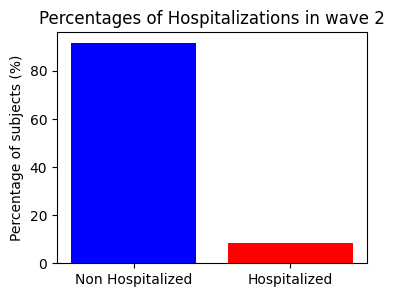

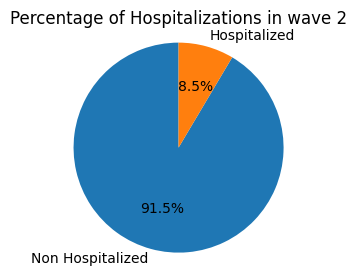

In [43]:
df2['r2hosp1y'].unique()

df2_notnan=df2.dropna(subset=['r2hosp1y'])
df2.shape

cant_hosp=df2_notnan['r2hosp1y'].value_counts()
print (cant_hosp)


# Bar Plot
# Total number of subjects
total_personas = cant_hosp.sum()
# Percentages
porcentajes = cant_hosp / total_personas * 100
# Plot
plt.figure(figsize=(4, 3))
plt.bar(porcentajes.index, porcentajes.values, color=['blue', 'red'])
plt.xticks([0, 1], ['Non Hospitalized', 'Hospitalized'])
plt.ylabel('Percentage of subjects (%)')
plt.title('Percentages of Hospitalizations in wave 2')
plt.show()


#pie Plot
# Calcular el total de personas
total_personas = cant_hosp.sum()
# Calcular los porcentajes
porcentajes = cant_hosp / total_personas * 100
# Crear el gráfico circular
plt.figure(figsize=(4, 3))
plt.pie(porcentajes, labels=['Non Hospitalized', 'Hospitalized'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Para que el círculo sea perfecto
plt.title('Percentage of Hospitalizations in wave 2')
plt.show()

2.5.3. Porcentage of hospitalizations in Wave 3

r3hosp1y
0.0    10379
1.0     1118
Name: count, dtype: int64


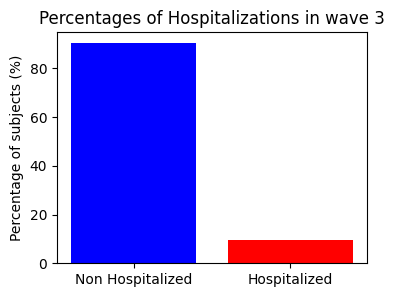

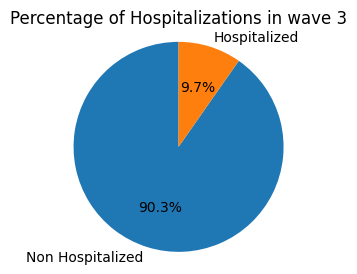

In [44]:
df2['r3hosp1y'].unique()

df2_notnan=df2.dropna(subset=['r3hosp1y'])
df2.shape

cant_hosp=df2_notnan['r3hosp1y'].value_counts()
print (cant_hosp)


# Bar Plot
# Total number of subjects
total_personas = cant_hosp.sum()
# Percentages
porcentajes = cant_hosp / total_personas * 100
# Plot
plt.figure(figsize=(4, 3))
plt.bar(porcentajes.index, porcentajes.values, color=['blue', 'red'])
plt.xticks([0, 1], ['Non Hospitalized', 'Hospitalized'])
plt.ylabel('Percentage of subjects (%)')
plt.title('Percentages of Hospitalizations in wave 3')
plt.show()


#pie Plot
# Calcular el total de personas
total_personas = cant_hosp.sum()
# Calcular los porcentajes
porcentajes = cant_hosp / total_personas * 100
# Crear el gráfico circular
plt.figure(figsize=(4, 3))
plt.pie(porcentajes, labels=['Non Hospitalized', 'Hospitalized'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Para que el círculo sea perfecto
plt.title('Percentage of Hospitalizations in wave 3')
plt.show()

2.5.4. Porcentage of hospitalizations in Wave 4

r4hosp1y
0.0    10429
1.0     1511
Name: count, dtype: int64


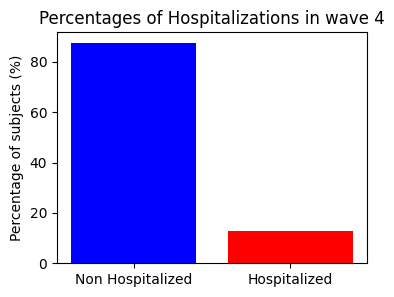

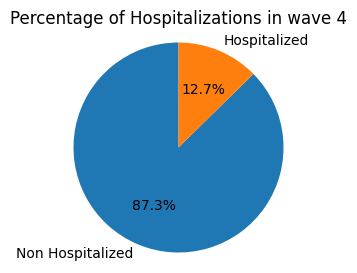

In [46]:
df2['r4hosp1y'].unique()

df2_notnan=df2.dropna(subset=['r4hosp1y'])
df2.shape

cant_hosp=df2_notnan['r4hosp1y'].value_counts()
print (cant_hosp)


# Bar Plot
# Total number of subjects
total_personas = cant_hosp.sum()
# Percentages
porcentajes = cant_hosp / total_personas * 100
# Plot
plt.figure(figsize=(4, 3))
plt.bar(porcentajes.index, porcentajes.values, color=['blue', 'red'])
plt.xticks([0, 1], ['Non Hospitalized', 'Hospitalized'])
plt.ylabel('Percentage of subjects (%)')
plt.title('Percentages of Hospitalizations in wave 4')
plt.show()


#pie Plot
# Calcular el total de personas
total_personas = cant_hosp.sum()
# Calcular los porcentajes
porcentajes = cant_hosp / total_personas * 100
# Crear el gráfico circular
plt.figure(figsize=(4, 3))
plt.pie(porcentajes, labels=['Non Hospitalized', 'Hospitalized'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Para que el círculo sea perfecto
plt.title('Percentage of Hospitalizations in wave 4')
plt.show()

2.5.5. Porcentage of hospitalizations in Wave 5

r5hosp1y
0.0    14714
1.0     2332
Name: count, dtype: int64


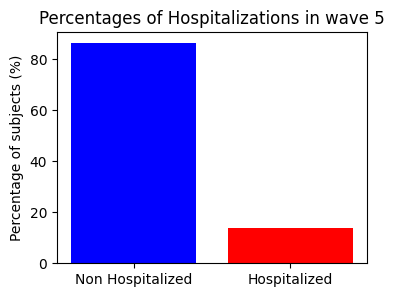

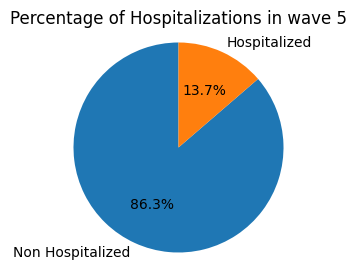

In [48]:
df2['r5hosp1y'].unique()

df2_notnan=df2.dropna(subset=['r5hosp1y'])
df2.shape

cant_hosp=df2_notnan['r5hosp1y'].value_counts()
print (cant_hosp)


# Bar Plot
# Total number of subjects
total_personas = cant_hosp.sum()
# Percentages
porcentajes = cant_hosp / total_personas * 100
# Plot
plt.figure(figsize=(4, 3))
plt.bar(porcentajes.index, porcentajes.values, color=['blue', 'red'])
plt.xticks([0, 1], ['Non Hospitalized', 'Hospitalized'])
plt.ylabel('Percentage of subjects (%)')
plt.title('Percentages of Hospitalizations in wave 5')
plt.show()


#pie Plot
# Calcular el total de personas
total_personas = cant_hosp.sum()
# Calcular los porcentajes
porcentajes = cant_hosp / total_personas * 100
# Crear el gráfico circular
plt.figure(figsize=(4, 3))
plt.pie(porcentajes, labels=['Non Hospitalized', 'Hospitalized'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Para que el círculo sea perfecto
plt.title('Percentage of Hospitalizations in wave 5')
plt.show()

2.6. Counting how many features are with the respondent, spouses and household

* In this study, we will focus on the Respondent
* The Householder variable will be removed from data

Our initial approach is to train the model using only data from the respondents, as we believe it is the most relevant information to properly train our model; also, given that our MPV requires interaction with the people interested in receiving a hospitalization prediction, we deem it best to ask them questions abouth themselves rather than their spouse or household, as such information might not be available during their interaction with our MVP.

In [9]:
df_r = df2[[col for col in df2.columns if col.startswith('r')]]
df_s = df2[[col for col in df2.columns if col.startswith('s')]]
df_h = df2[[col for col in df2.columns if col.startswith('h')]]
ur,fr=df_r.shape
us,fs=df_s.shape
uh,fh=df_h.shape
print('Respondent has',fr,' features.\n')
print('Spouse has',fs,' features.\n')
print('Household has',fh,' features.\n')

Respondent has 2398  features.

Spouse has 2457  features.

Household has 354  features.



2.7. Missing values of respondent database

Number of features: 2398


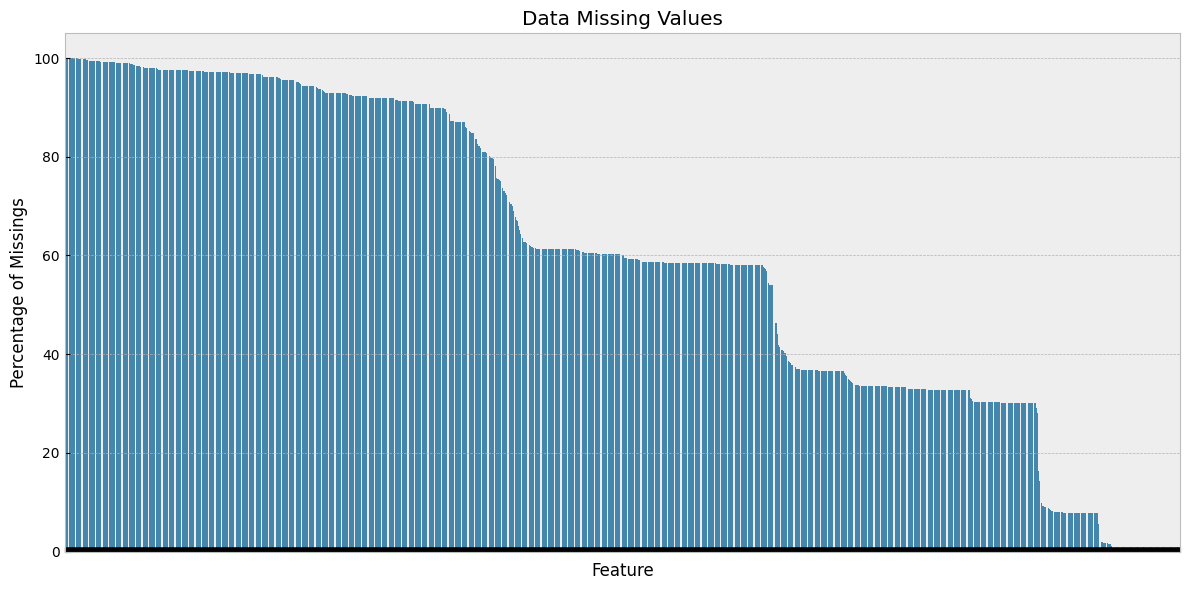

In [10]:
print(f"Number of features: {df_r.shape[1]}")
eda.plot_missing_values(df_r)

2.8. Counting how many features are in each wave

In [19]:
df_w1 = df2[[col for col in df2.columns if len(col) > 1 and col[1] == '1']]
df_w2 = df2[[col for col in df2.columns if len(col) > 1 and col[1] == '2']]
df_w3= df2[[col for col in df2.columns if len(col) > 1 and col[1] == '3']]
df_w4= df2[[col for col in df2.columns if len(col) > 1 and col[1] == '4']]
df_w5= df2[[col for col in df2.columns if len(col) > 1 and col[1] == '5']]
df_wt= df2[[col for col in df2.columns if len(col) > 1 and col[1] == 'a']]
u1,f1=df_w1.shape
u2,f2=df_w2.shape
u3,f3=df_w3.shape
u4,f4=df_w4.shape
u5,f5=df_w5.shape
ut,ft=df_wt.shape
print('The wave 1 has',f1,' features.\n')
print('The wave 2 has',f2,' features.\n')
print('The wave 3 has',f3,' features.\n')
print('The wave 4 has',f4,' features.\n')
print('The wave 5 has',f5,' features.\n')
print('All waves has',ft,' features.\n')

The wave 1 has 962  features.

The wave 2 has 1083  features.

The wave 3 has 1159  features.

The wave 4 has 999  features.

The wave 5 has 988  features.

All waves has 16  features.



# 3. Data Analysis Exploratory of Wave 5

3.1. Filtering the wave 5 database

In [49]:
df_w5a = df_r[[col for col in df_r.columns if len(col) > 1 and col[1] == '5']]
df_w5a.shape

(17114, 454)

The database has 454 features and 17114 respondants

3.2. Missing values in the wave 5

Number of features: 454


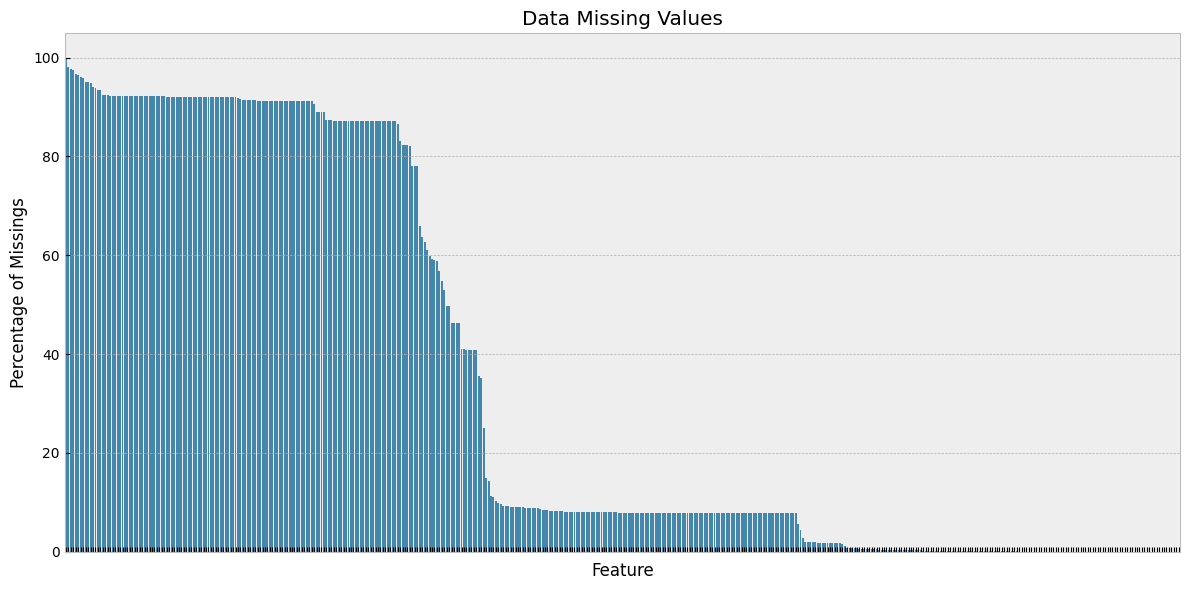

In [21]:
print(f"Number of features: {df_w5a.shape[1]}")
eda.plot_missing_values(df_w5a)

3.3. The target variable in the wave 5

* The target variable belongs to *Section C: Health Care Utilization and Insurance* and is labeled **Medical Care Utilization: Hospital** *`rhosp1y`*

* *rhosp1y* indicates whether the respondent reports at least one overnight hospital stay in the last 12 months. RHOSP1Y is coded as 0 if the respondent had no overnight hospital stays, and is coded as 1 if the respondent had at least one overnight hospital stay. 

In [50]:
df_w5a['r5hosp1y'].unique()

array([ 0.,  1., nan])

3.3.1. Eliminating the nan from target variable

Our first step is to remove all rows containing missing values in our target variable. Why remove them instead of imputate them? Because this is our ground truth: We cannot alter it by somehow estimating missing values from the data. If we attempt to imputate our ground truth with other features, we'd be incorporating information about the data into the target variable, which could very likely lead us to overfit our model.

In [51]:
df_w5a_notnan=df_w5a.dropna(subset=['r5hosp1y'])
df_w5a_notnan.shape

(17046, 454)

3.3.2. Counting the Hospitalized and not Hospitalized subjects in the last 12 months

In [52]:
cant_hosp=df_w5a_notnan['r5hosp1y'].value_counts()
print (cant_hosp)

r5hosp1y
0.0    14714
1.0     2332
Name: count, dtype: int64


3.3.3. Plot of Hospitalized and not Hospitalized

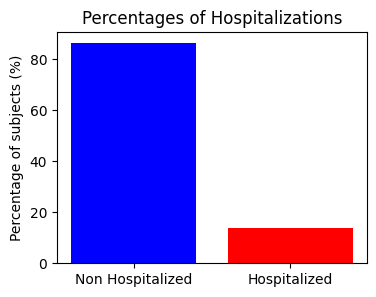

In [54]:
# Total number of subjects
total_personas = cant_hosp.sum()

# Percentages
porcentajes = cant_hosp / total_personas * 100

# Plot
plt.figure(figsize=(4, 3))
plt.bar(porcentajes.index, porcentajes.values, color=['blue', 'red'])
plt.xticks([0, 1], ['Non Hospitalized', 'Hospitalized'])
plt.ylabel('Percentage of subjects (%)')
plt.title('Percentages of Hospitalizations')
plt.show()

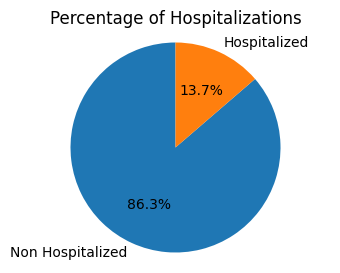

In [56]:
# Calcular el total de personas
total_personas = cant_hosp.sum()

# Calcular los porcentajes
porcentajes = cant_hosp / total_personas * 100

# Crear el gráfico circular
plt.figure(figsize=(4, 3))
plt.pie(porcentajes, labels=['Non Hospitalized', 'Hospitalized'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Para que el círculo sea perfecto
plt.title('Percentage of Hospitalizations')
plt.show()

3.4. Age Distribution of Participants in the wave 5

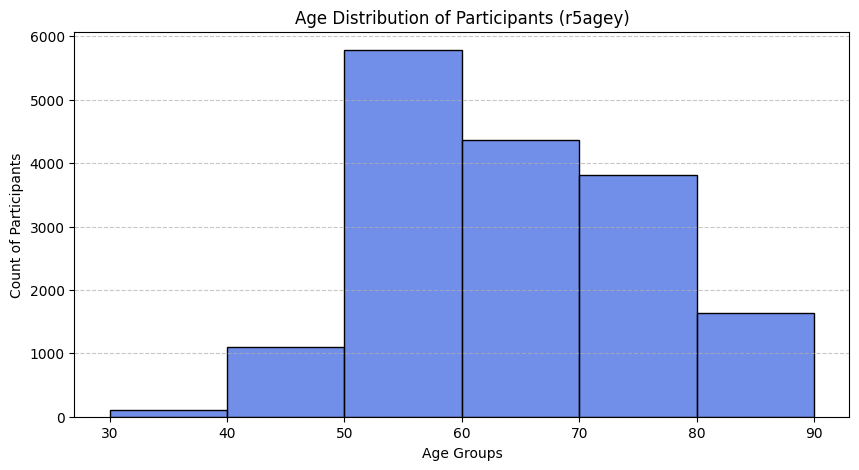

In [34]:
eda.plot_age_histogram(df_w5a_notnan, 'r5agey')

3.5. Filtering the data by elderly people only(50+)

In [57]:
df_filtered = eda.filter_age(df_w5a_notnan, 'r5agey')
print(f'Shape: {df_filtered.shape}')


Shape: (15807, 454)


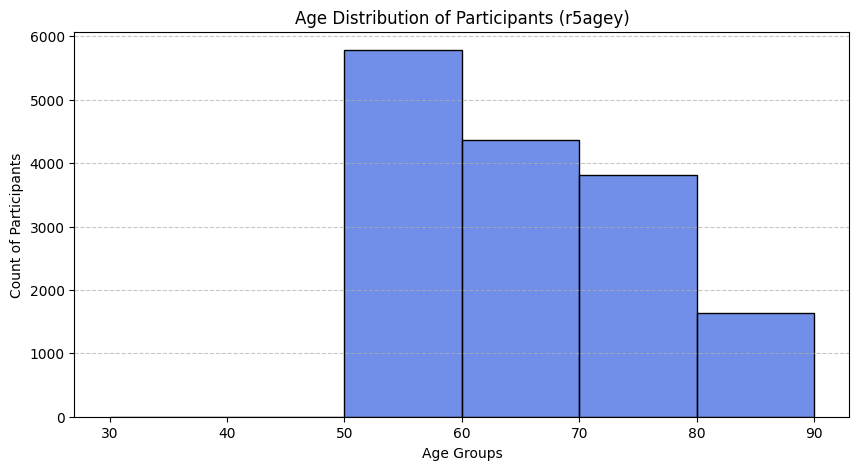

In [58]:
eda.plot_age_histogram(df_filtered, 'r5agey')

3.6. Drop-high-rate-missing-values-columns

Drop columns with a high rate of missing values

We have decided to drop columns with a high missing values ratio (>0.5). A column with such a high proportion of missing values hints at survey unreliability and it doesn't make much sense to imputate missing values when their proportion is higher than existing values.

In [59]:
variables_to_drop = preprocessing.missing_value_ratio(df_filtered, 0.5)

# Drop the columns with specified missing values ratio
df_filtered = df_filtered.drop(columns=variables_to_drop)

# Verify columns were droped. Starting column count is 469
print(f'New column count: {df_filtered.shape[1]}')

Variables with a missing value ratio higher than 0.5: ['r5resplmt', 'r5hrtatlmt', 'r5stroklmt', 'r5arthlmt', 'r5reccancr', 'r5rechrtatt', 'r5recstrok', 'r5paina', 'r5strtsmok', 'r5quitsmok', 'r5prost', 'r5ciqscore1', 'r5ciqscore2', 'r5ciqscore3', 'r5ciqscore4', 'r5ciqscore5', 'r5ciqscore6', 'r5ciqscore7', 'r5ciqscore8', 'r5ciqscore9', 'r5ciqscore10', 'r5ciqscore11', 'r5ciqscore12', 'r5ciqscore13', 'r5ciqscore14', 'r5ciqscore15', 'r5ciqscore16', 'r5cjormscore', 'r5prmem', 'r5prchmem', 'r5rjudg', 'r5rorgnz', 'r5lost', 'r5wander', 'r5alone', 'r5haluc', 'r5slfemp', 'r5unemp', 'r5jhours', 'r5jcten', 'r5jredhr', 'r5jlocc_m', 'r5jlasty', 'r5jrsleft', 'r5retyr', 'r5retage', 'r5pubage', 'r5penage', 'r5dresshlp', 'r5walkhlp', 'r5bathehlp', 'r5eathlp', 'r5bedhlp', 'r5toilethlp', 'r5mealhlp', 'r5shophlp', 'r5medhlp', 'r5moneyhlp', 'r5racany', 'r5racaany', 'r5rascare', 'r5rascaredpm', 'r5rascaredpmm', 'r5rascarehr', 'r5rascarehrm', 'r5raccare', 'r5raccaren', 'r5raccaredpm', 'r5raccaredpmm', 'r5racc